¡Hola!

Mi nombre es Tonatiuh Cruz. Me complace revisar tu proyecto hoy.

Al identificar cualquier error inicialmente, simplemente los destacaré. Te animo a localizar y abordar los problemas de forma independiente como parte de tu preparación para un rol como data-scientist. En un entorno profesional, tu líder de equipo seguiría un enfoque similar. Si encuentras la tarea desafiante, proporcionaré una pista más específica en la próxima iteración.

Encontrarás mis comentarios a continuación - **por favor no los muevas, modifiques o elimines**.

Puedes encontrar mis comentarios en cajas verdes, amarillas o rojas como esta:

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Éxito. Todo está hecho correctamente.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Observaciones. Algunas recomendaciones.
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Necesita corrección. El bloque requiere algunas correcciones. El trabajo no puede ser aceptado con comentarios en rojo.
</div>

Puedes responderme utilizando esto:

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante.</b> <a class="tocSkip"></a>
</div>

# Proyecto integrado: Online Ice - campaña venta de video juegos.

**Descripción del proyecto:**

Trabajas para la tienda online Ice que vende videojuegos por todo el mundo. Las reseñas de usuarios y expertos, los géneros, las plataformas (por ejemplo, Xbox o PlayStation) y los datos históricos sobre las ventas de juegos están disponibles en fuentes abiertas. Tienes que identificar patrones que determinen si un juego tiene éxito o no. Esto te permitirá detectar proyectos prometedores y planificar campañas publicitarias.

Delante de ti hay datos que se remontan a 2016. Imaginemos que es diciembre de 2016 y estás planeando una campaña para 2017.

Lo importante es adquirir experiencia de trabajo con datos. Realmente no importa si estás pronosticando las ventas de 2017 en función de los datos de 2016 o las ventas de 2027 en función de los datos de 2026.

El dataset contiene una columna "rating" que almacena la clasificación ESRB de cada juego. El Entertainment Software Rating Board (la Junta de clasificación de software de entretenimiento) evalúa el contenido de un juego y asigna una clasificación de edad como Adolescente o Adulto.


**Descripción de datos**

— Name (Nombre)

— Platform (Plataforma)

— Year_of_Release (Año de lanzamiento)

— Genre (Género) 

— NA_sales (ventas en Norteamérica en millones de dólares estadounidenses) 

— EU_sales (ventas en Europa en millones de dólares estadounidenses) 

— JP_sales (ventas en Japón en millones de dólares estadounidenses) 

— Other_sales (ventas en otros países en millones de dólares estadounidenses) 

— Critic_Score (máximo de 100) 

— User_Score (máximo de 10) 

— Rating (ESRB)

*Es posible que los datos de 2016 estén incompletos.*

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math as mt
from scipy import stats as st
import seaborn as sns


<div class="alert alert-block alert-success">
<b>Comentario del revisor:</b> <a class="tocSkip"></a>
    
Has realizado un excelente trabajo al importar los datos y las bibliotecas necesarias.

</div>

###  Abre el archivo de datos y estudia la información general 

In [2]:
games = pd.read_csv('/datasets/games.csv')
games.head(5)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


### Prepara los datos

2.1 Reemplaza los nombres de las columnas (ponlos en minúsculas).

In [3]:
# remplazar los nombres de las columnas a minúsculas
# uso la funcion map junto con str.lower para asignar nuevos valores a games.columns

games.columns = map(str.lower, games.columns)
games.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

2.2 Convierte los datos en los tipos necesarios. Describe las columnas en las que los tipos de datos han sido cambiados y explica por qué.

In [4]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


**Columnas a cambiar**
- `year_of_release`   a int: se realizará posteriormente de tratar los valores ausentes (para asegurarnos que el año sea correcto)
 
- `user_score`        a float: se realizará posteriormente de tratar los valores (debe ser una columna numérica)


Si es necesario, elige la manera de tratar los valores ausentes: Explica por qué rellenaste los valores ausentes como lo hiciste o por qué decidiste dejarlos en blanco. ¿Por qué crees que los valores están ausentes? Brinda explicaciones posibles. Presta atención a la abreviatura TBD: significa "to be determined" (a determinar). Especifica cómo piensas manejar estos casos.

2.3 Tratar valores ausentes

**en name, year_of_release, genre, critic_score, user_score, rating**

**Columna name y genre:**

In [5]:
games.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

In [6]:
#juegos sin nombre en el dataframe
games[games['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


**Observación:**

Solo tenemos 2 juegos de la consola GEN sin datos, las ventas de Japón aparecen en una fila incorrecta

Todo indica que la información de un mismo juego está separada en una línea para las ventas de Japón, lo ideal sería mantener los datos en una sola fila en nuestro data frame, podemos corregir el valor y eliminar la fila 14244,

además renombras N/A como No Name y No genre


In [7]:
# corregir las ventas en Japón usando at()
games.at[659,'jp_sales'] = 0.03
games.at[659,'name'] = 'No Name'
games.at[659,'genre'] = 'No Genre'

In [8]:
# eliminar fila duplicada para las ventas de JP y verificar NA de nuevo 
games.drop(14244, inplace = True)
games.reset_index(drop=True, inplace=True)
games[games['name'].isna()].sum()

name               0.0
platform           0.0
year_of_release    0.0
genre              0.0
na_sales           0.0
eu_sales           0.0
jp_sales           0.0
other_sales        0.0
critic_score       0.0
user_score         0.0
rating             0.0
dtype: float64

Podemos confirmar que no hay más valores ausentes en la columna Name sin perder los datos de las ventas en Japón

**Columna 'year_of_release':**

In [9]:
games['year_of_release'].isna().sum()

269

In [10]:
# Juegos sin año de lanzamiento
games[games['year_of_release'].isna()].head(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN


In [11]:
#podemos comprobar que hay valores NaN con homónimos con información completa
games[games['name']=='LEGO Batman: The Videogame']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
397,LEGO Batman: The Videogame,X360,2008.0,Action,2.04,1.02,0.0,0.32,76.0,7.9,E10+
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.0,0.29,74.0,7.9,E10+
460,LEGO Batman: The Videogame,DS,2008.0,Action,1.75,1.01,0.0,0.29,72.0,8,E10+
1519,LEGO Batman: The Videogame,PS3,2008.0,Action,0.72,0.39,0.0,0.19,75.0,7.7,E10+
1538,LEGO Batman: The Videogame,PSP,NaN,Action,0.57,0.44,0.0,0.27,73.0,7.4,E10+
1553,LEGO Batman: The Videogame,PS2,2008.0,Action,0.72,0.03,0.0,0.52,77.0,8.9,E10+
12465,LEGO Batman: The Videogame,PC,2008.0,Action,0.02,0.03,0.0,0.01,80.0,7.8,E10+


**Observación:**

Para un mismo juego pueden haber valores NaN en algunas plataformas, esto pude deberse a que no se registró el año, sin embargo podemos usar como referencia el año de lanzamiento en otras consolas para el mismo título. 

In [12]:
#uso groupby para extraer el valor del primer lanzamiento para cada juego homónimo y usar fillna
fill_by_name = games.groupby(['name'])['year_of_release'].transform('min')


# usar fillna() con el método transform para ejecutar fill_by_name en cada fila que sea NaN
games['year_of_release'] = games['year_of_release'].fillna(fill_by_name)
games[games['name']=='LEGO Batman: The Videogame'] 

#prueba con un juego - OK

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
397,LEGO Batman: The Videogame,X360,2008.0,Action,2.04,1.02,0.0,0.32,76.0,7.9,E10+
456,LEGO Batman: The Videogame,Wii,2008.0,Action,1.80,0.97,0.0,0.29,74.0,7.9,E10+
460,LEGO Batman: The Videogame,DS,2008.0,Action,1.75,1.01,0.0,0.29,72.0,8,E10+
1519,LEGO Batman: The Videogame,PS3,2008.0,Action,0.72,0.39,0.0,0.19,75.0,7.7,E10+
1538,LEGO Batman: The Videogame,PSP,2008.0,Action,0.57,0.44,0.0,0.27,73.0,7.4,E10+
1553,LEGO Batman: The Videogame,PS2,2008.0,Action,0.72,0.03,0.0,0.52,77.0,8.9,E10+
12465,LEGO Batman: The Videogame,PC,2008.0,Action,0.02,0.03,0.0,0.01,80.0,7.8,E10+


In [13]:
games['year_of_release'].isna().sum()

146

**Observación:**

Se logro reducir el número de valores ausentes de 269 a 146, los juegos restantes no cuentan con un homónimo de otra plataforma, por lo que debemos realizar un estimado para su año de lanzamiento.

In [14]:
# Evaluaremos el rango de lanzamiento para PS4 con el uso de min() y max()

games_PS4 = games[games['platform']=="PS4"]
print(games_PS4['year_of_release'].min())
print(games_PS4['year_of_release'].max())

2013.0
2016.0


In [15]:
# Uso de la mediana para estimar el año de lanzamiento de videojuegos restantes según su plataforma
# Uso groupby por plataforma y caculo la mediana, uso round() para evitar decimales

fill_by_platform = games.groupby(['platform'])['year_of_release'].median().round()
fill_by_platform

platform
2600    1982.0
3DO     1995.0
3DS     2013.0
DC      2000.0
DS      2008.0
GB      1997.0
GBA     2003.0
GC      2003.0
GEN     1993.0
GG      1992.0
N64     1999.0
NES     1986.0
NG      1994.0
PC      2010.0
PCFX    1996.0
PS      1998.0
PS2     2004.0
PS3     2011.0
PS4     2015.0
PSP     2009.0
PSV     2014.0
SAT     1996.0
SCD     1994.0
SNES    1994.0
TG16    1995.0
WS      2000.0
Wii     2009.0
WiiU    2013.0
X360    2010.0
XB      2004.0
XOne    2015.0
Name: year_of_release, dtype: float64

In [16]:
# parece razonable que la mediana sea usada como criterio para realizar un estimado sobre los datos
# de esta forma usamos los periodos de tiempo adecuados de cada consola como referencia

#creo fill by plataform para usar posteriormente en el dataframe
fill_by_platform = games.groupby(['platform'])['year_of_release'].transform('median').round()

# usar fillna() con el método transform para ejecutar fill_by_platform en cada fila que sea NaN
games['year_of_release'] = games['year_of_release'].fillna(fill_by_platform)

# sample luego del fillna para la consola PS4
games[games['platform']=='PS4'].sample(8, random_state=1)


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
2210,EA Sports UFC 2,PS4,2016.0,Sports,0.29,0.49,0.00,0.15,79.0,6.2,T
5988,Deadpool,PS4,2015.0,Action,0.14,0.11,0.00,0.05,60.0,5.7,M
15011,Blade Arcus from Shining EX,PS4,2015.0,Fighting,0.00,0.00,0.02,0.00,NaN,NaN,NaN
3645,Resident Evil: Revelations 2,PS4,2015.0,Action,0.13,0.24,0.10,0.07,75.0,7.7,M
16134,Super Stardust Ultra VR,PS4,2016.0,Shooter,0.00,0.01,0.00,0.00,66.0,6.2,E10+
10252,Wasteland 2,PS4,2015.0,Role-Playing,0.08,0.00,0.02,0.02,NaN,NaN,NaN
2097,Final Fantasy Type-0,PS4,2015.0,Role-Playing,0.37,0.32,0.15,0.14,NaN,NaN,NaN
2600,Pro Evolution Soccer 2016,PS4,2015.0,Sports,0.13,0.42,0.13,0.10,87.0,7.1,E


In [17]:
# verificar que no hay valores ausentes
games['year_of_release'].isna().sum()

0

In [18]:
# convertir a int el año de lanzamiento
games['year_of_release'] = games['year_of_release'].astype(int)

**Observación:**

**Otros juegos publicados para cada plataforma nos permiten tener un estimado del periodo de lanzamientos** y con esa información podemos complementar cada juego ausente restante y así poder continuar con nuestro análisis. 

**Columnas 'critic_score', 'user_score' y 'rating' :**

In [19]:
# Revision de % de Na restante en otras columnas
games.isna().sum() * 100 / len(games)

name                0.000000
platform            0.000000
year_of_release     0.000000
genre               0.000000
na_sales            0.000000
eu_sales            0.000000
jp_sales            0.000000
other_sales         0.000000
critic_score       51.316262
user_score         40.086155
rating             40.475051
dtype: float64

In [20]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16714 entries, 0 to 16713
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16714 non-null  object 
 1   platform         16714 non-null  object 
 2   year_of_release  16714 non-null  int64  
 3   genre            16714 non-null  object 
 4   na_sales         16714 non-null  float64
 5   eu_sales         16714 non-null  float64
 6   jp_sales         16714 non-null  float64
 7   other_sales      16714 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(5), int64(1), object(5)
memory usage: 1.4+ MB


Existen valores ausentes considerables para las columnas de  'critic_score', 'user_score' y 'rating' 

In [21]:
#user_score está en formato str debido a ‘tbd’

games[games['user_score'] == "tbd"].head(3)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010,Sports,3.45,2.59,0.0,0.66,NaN,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005,Misc,2.08,1.35,0.0,0.54,61.0,tbd,E10+
520,Zumba Fitness 2,Wii,2011,Sports,1.51,1.03,0.0,0.27,NaN,tbd,T


In [22]:
# tbd indica que el valor es ausente hasta que se determine, así que se puede reemplazar por NaN
# es incluso probable que no vaya a existir ese valor en algunos casos y que nunca sean calificados

#uso de replace para definir tbd como NaN
games['user_score'] = games['user_score'].replace('tbd', 'NaN')

In [23]:
#transformar la columna user_score a float para poder analizar posteriormente
games['user_score'] = games['user_score'].astype(float)

In [24]:
#ahora analizaremos si podemos estimar los valores NaN
#hay alguna relacion entre critic y user score?

no_na_scores = games[(games['critic_score'].notna()) & (games['user_score'].notna())]
no_na_scores 

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
...,...,...,...,...,...,...,...,...,...,...,...
16672,Mortal Kombat: Deadly Alliance,GBA,2002,Fighting,0.01,0.00,0.00,0.00,81.0,8.8,M
16691,Metal Gear Solid V: Ground Zeroes,PC,2014,Action,0.00,0.01,0.00,0.00,80.0,7.6,M
16695,Breach,PC,2011,Shooter,0.01,0.00,0.00,0.00,61.0,5.8,T
16701,STORM: Frontline Nation,PC,2011,Strategy,0.00,0.01,0.00,0.00,60.0,7.2,E10+


In [25]:
print('Corr critic/user:', no_na_scores['user_score'].corr(no_na_scores['critic_score']))

Corr critic/user: 0.5808778320767237


**Observación:**

**La correlación entre los valores de ambas columnas es moderada-fuerte** lo cual no nos permite hacer un estimado para user_score a partir de critic score que no afecte de forma significativa la precisión de los datos, **tampoco otras columnas permiten obtener información** para estimar los valores.

No es posible eliminar los valores ausentes ya que representan una cantidad importante de cada columna, tampoco para rating, por lo cual **se conservarán los NaN para las columnas 'critic_score', 'user_score' y 'rating'**


In [26]:
# revisión final para los tipos de datos
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16714 entries, 0 to 16713
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16714 non-null  object 
 1   platform         16714 non-null  object 
 2   year_of_release  16714 non-null  int64  
 3   genre            16714 non-null  object 
 4   na_sales         16714 non-null  float64
 5   eu_sales         16714 non-null  float64
 6   jp_sales         16714 non-null  float64
 7   other_sales      16714 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [27]:
games.duplicated().sum()

0

Ahora contamos con todos los tipos de datos deseados para el análisis, además de confirmar que no hay duplicados.

**2.4 Calcula las ventas totales**  (la suma de las ventas en todas las regiones) para cada juego y coloca estos valores en una columna separada.

In [28]:
#creo una nueva columna con la suma de cada región 
games['total_sales'] = games['na_sales'] + games['eu_sales'] + games['jp_sales'] + games['other_sales']
games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


<div class="alert alert-block alert-success">
<b>Comentario del revisor:</b> <a class="tocSkip"></a>
    
Hola, Sebastián! Muy buen trabajo en la sección, ajustaste los nombres de las columnas a minúsculas con el uso de la función str.lower(), cambiaste el tipo de variable de dos de las variables de la base de datos, consideraste ajustar los valores ausentes de las variables identificadas de score y muy buen trabajo con la suma de todas las ventas. 
    
   

</div>

**3. Analizar los Datos**

3.1 Mira cuántos juegos fueron lanzados en diferentes años. ¿Son significativos los datos de cada período?

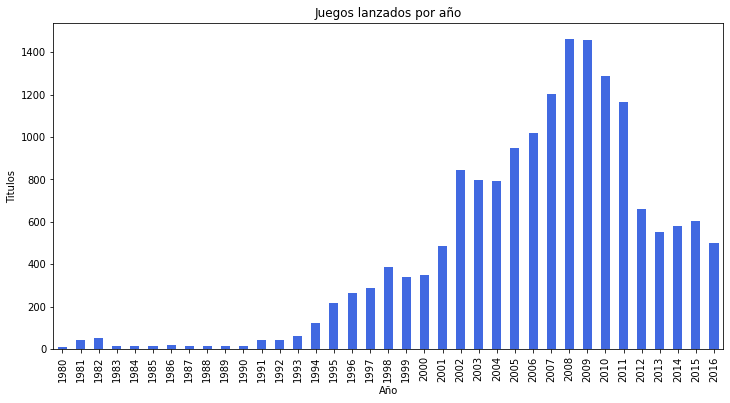

In [29]:
#uso groupby y count para analizar cuantos juegos fueron lanzados en cada año 

games_year = games.groupby(by="year_of_release")['name'].count() 

#creo una gráfica de barras para juegos por año
games_year.plot(kind='bar', 
                title= "Juegos lanzados por año",
                figsize=(12,6),
                xlabel = "Año",
                ylabel = "Titulos",
                color = '#4169e1'
               )
plt.show()

**Observaciones**:

 1. Antes de los años 90' era muy costoso crear y comprar videojuegos, luego esta tecnología se masifico y se volvió más eficiente por lo que nuevos proveedores y clientes entraron al mercado.
 
 
 2. En el periodo comprendido **Entre 2002 y 2011 ocurrió la mayor cantidad de ventas**. Explicado por una nueva generación de consolas como la PS2 y Xbox 360 aprovechando la creciente demanda.
 
 
 3. **Luego de 2012 existe una disminucion** en la cantidad de juegos vendidos y **se sitúa en un rango entre 500 y 600 títulos al año**, se puede pensar que la incorporación de juegos multi plataforma, opciones online y ventas dentro de los mismos jugos han hecho que las empresas se enfoquen en estos tipos de ingresos en un numero determinado de juegos exitosos.


3.2 Observa cómo varían las ventas de una plataforma a otra. Elige las plataformas con las mayores ventas totales y construye una distribución basada en los datos de cada año.

In [30]:
#uso groupby en platform para analizar las ventas 

platform_sales = games.groupby(by=['platform'])['total_sales'].count()
platform_sales.sort_values(ascending=False).head(5)

platform
PS2     2161
DS      2151
PS3     1331
Wii     1320
X360    1262
Name: total_sales, dtype: int64

In [31]:
# creo una lista de las 5 plataformas con más ventas
# filtro el dataframe por las plataformas más exitosas

top_platform = ['PS2', 'DS', 'PS3', 'Wii', 'X360']               
top_platform_sales = games[games['platform'].isin(top_platform)] 

top_platform_sales.reset_index(drop=True, inplace = True)

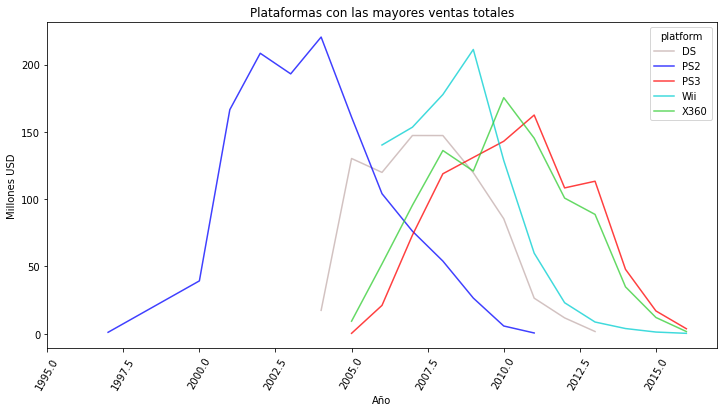

In [32]:
# creo una pivot table con los datos de ventas para el top de plataformas
# uso como index year para graficar vs las ventas totales

top_platform_sales_chart= top_platform_sales.pivot_table(index = ['year_of_release'],
                              columns = 'platform',                      
                              values = 'total_sales',
                              aggfunc = 'sum',                  
                              )

# creo una gráfica para la distribución de ventas por cada plataforma
top_platform_sales_chart.plot(
                        title='Plataformas con las mayores ventas totales', 
                        xlabel='Año', 
                        ylabel='Millones USD', 
                        figsize=[12, 6],
                        rot=60,
                        xlim = (1995,2017),
                        color = {'PS2':"blue", 'DS': '#c4aead','PS3': 'Red', 'Wii': '#00ced1', 'X360': "#32cd32" },
                        alpha = 0.75
                        )

plt.show()

**Observaciones**:
 1. Las consolas con más ventas hasta 2016 son **'PS2', 'DS', 'PS3', 'Wii', 'X360'** en este orden.
 
 
 2. **Existe una gran similitud en las ventas para periodos de tiempo específicos**, como el PS3 y el Xbox 360, con una distribución de ventas similar y Nintendo con dos plataformas simultaneas el DS y la Wii.
 
 
 3. Podemos ver los ciclos de las consolas con **la transición entere PS2 y PS3, una vez sale la nueva generación las ventas de la anterior suelen disminuir en un periodo de transición** que se analizara a continuación.


3.3 Busca las plataformas que solían ser populares pero que ahora no tienen ventas. ¿Cuánto tardan generalmente las nuevas plataformas en aparecer y las antiguas en desaparecer?

In [33]:
games['platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

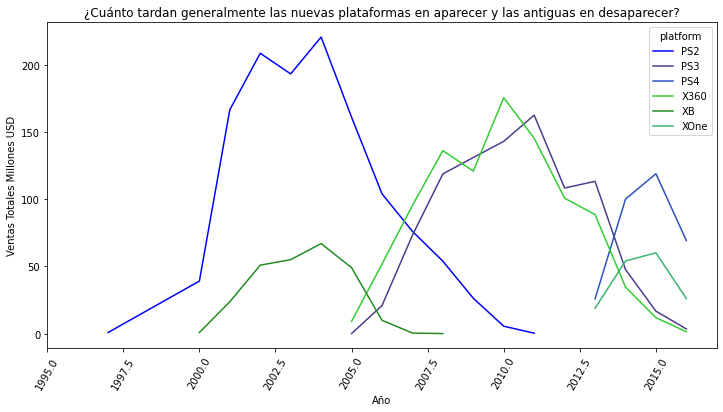

In [34]:
# analizare el comportamiento de PlayStation y  Xbox en diferentes generaciones
cycle_platform = ['PS2', 'PS3', 'PS4', 'XB', 'X360', 'XOne']

# Filtro el data frame por las plataformas seleccionadas para analizar su estacionalidad
cycle_platform_sales = games[games['platform'].isin(cycle_platform)]
cycle_platform_sales.reset_index(drop=True, inplace = True)


#creo una pívot table con los datos de ventas de plataformas PS y XB para graficar 
cycle_platform_chart= cycle_platform_sales.pivot_table(index = ['year_of_release'],
                              columns = 'platform',                      
                              values = 'total_sales',
                              aggfunc = 'sum',                  
                              )

# creo una gráfica para la distribución de ventas por cada consola
cycle_platform_chart.plot(
                        title='¿Cuánto tardan generalmente las nuevas plataformas en aparecer y las antiguas en desaparecer?', 
                        xlabel='Año', 
                        ylabel='Ventas Totales Millones USD', 
                        figsize=[12, 6],
                        rot=60,
                        xlim = (1995,2017),
                        color = {'PS2':"blue", 'PS3': '#483d8b','PS4': '#2a52be', 'XB': '#228b22', 'X360': "#32cd32", 'XOne': "#3cb371",}
                        )

plt.show()

**Observaciones**:

1. Para dos de las plataformas con más ventas (PlayStation: Azul y Xbox: Verde) los **ciclos de una nueva generación de consolas se ubican en el rango 7 a 10 años.**
 
 
 2. Los **primeros 3 años son de crecimiento**, luego existe un **periodo de maduración donde se estancan las ventas (1 a 2 años)** y por último cuando la nueva generación es anunciada **las ventas disminuyen hasta detenerse en 3 años.**


3.4 Determina para qué período debes tomar datos. Para hacerlo mira tus respuestas a las preguntas anteriores. Los datos deberían permitirte construir un modelo para 2017.

**Periodo a analizar**

**Según el analisis anterior se construira el modelo para 2017 con datos desde el 2011 hasta el 2016, comprendiendo los ultimos 5 años de infromacion.**

Los datos anteriores a este periodo no son relvantes para el mercado actual y por ende no se tomaran en cuenta por que pertenecen a plataformas que ya terminaron su ciclo de vida o estan por hacerlo.


3.5 Trabaja solo con los datos que consideras relevantes. Ignora los datos de años anteriores.

In [35]:
# creo model_data para trabajar solo con los datos recientes (5 años)
model_data = games[(games['year_of_release']>=2011)]

3.6 ¿Qué plataformas son líderes en ventas? ¿Cuáles crecen y cuáles se reducen? Elige varias plataformas potencialmente rentables.

In [36]:
# uso groupby para encontrar las plataformas más rentables en los últimos años
# uso sort_values y luego head() para extraer las más importantes

top_platforms = model_data.groupby(by='platform')['total_sales'].sum().sort_values(ascending = False).head(10)
top_platforms

platform
PS3     452.15
X360    382.75
PS4     314.14
3DS     258.68
XOne    159.32
PC       98.67
Wii      96.39
WiiU     82.19
PSV      54.07
DS       39.54
Name: total_sales, dtype: float64

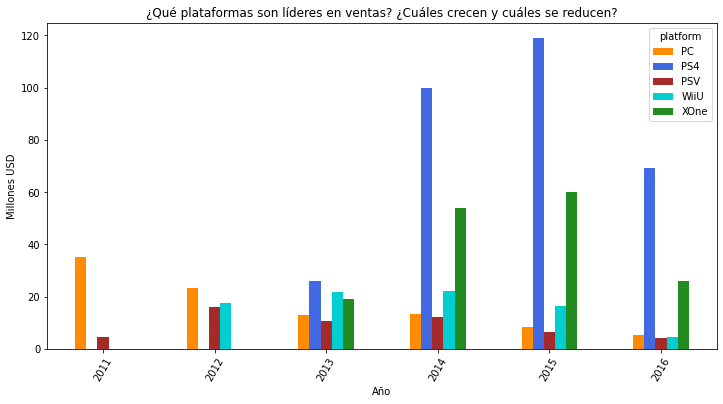

In [37]:
# Selecionare las plataformas con mayor potencial descartando las versiones antiguas 
profitable_platform = ['PS4','XOne','WiiU', 'PC', 'PSV']

#Filtro el data frame por las plataformas potenciales
profitable_platform = model_data[model_data['platform'].isin(profitable_platform)]
profitable_platform.reset_index(drop=True, inplace = True)


#creo una pívot table con los datos de ventas para plataformas potenciales
profitable_platform_chart= profitable_platform.pivot_table(index = ['year_of_release'],
                              columns = 'platform',                      
                              values = 'total_sales',
                              aggfunc = 'sum',                  
                              )

# creo una gráfica para la distribución de ventas para plataformas potenciales
profitable_platform_chart.plot(kind = 'bar',
                        title='¿Qué plataformas son líderes en ventas? ¿Cuáles crecen y cuáles se reducen?', 
                        xlabel='Año', 
                        ylabel='Millones USD', 
                        figsize=[12, 6],
                        rot=60,
                        xlim = (1995,2017),
                        color = {'PS4':"#4169e1", 'XOne': '#228b22','WiiU': '#00ced1', 'PC': '#ff8c00', 'PSV': "#a52a2a"}
                        )
plt.show()

**Observaciones**:
1. **La plataforma potencial con mayor crecimiento es la PS4 seguida por la Xbox One** ambas con año de lanzamiento 2013. Son las únicas que han crecido en ventas de juegos año a año.

 
2. Las otras plataformas **PC, WiiU y PSV han disminuido en ventas.** Es probable que muchos usuarios de estas plataformas se hayan interesado por las opciones ofrecidas por otras platafromas.


3. **El año 2016 está incompleto** y es normal que los valores sean menores a 2015 hasta que se cierre el año, sin embargo es claro que **la tendencia de PS4 y Xbox se mantendrá para 2016**.


3.7 Crea un diagrama de caja para las ventas globales de todos los juegos, desglosados por plataforma. ¿Son significativas las diferencias en las ventas? ¿Qué sucede con las ventas promedio en varias plataformas? Describe tus hallazgos.

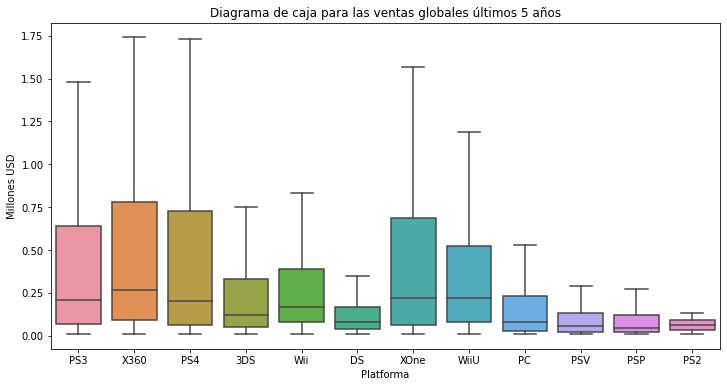

In [38]:
# uso groupby para plataforma y nombre con las ventas totales
box = model_data.groupby(['platform','name'])['total_sales'].sum().reset_index()

#creo una grafica vacia
plt.figure(figsize=(12,6))

#defino el orden de las cajas
order_1 = model_data['platform'].unique()

#uso seaborn para crear el box con mayor facilidad

sns.boxplot(data = box,                                       
            x='platform',
            y='total_sales', 
            showfliers=False,                                     
            order = order_1,                                       # defino el orden deseado                                     
            ).set_title('Diagrama de caja para las ventas globales últimos 5 años')
            
plt.xlabel('Platforma')                                           # nombre eje x                                     
plt.ylabel('Millones USD')                                        # nombre eje y  
plt.show()

In [39]:
# creo una pivot table con mean, var, y total para interpretar los resultados
model_data.pivot_table(index= 'platform', values = "total_sales", aggfunc =['mean', 'var','sum']).sort_values(('sum',"total_sales"), ascending = False).head(10)


,mean,var,sum
,total_sales,total_sales,total_sales
platform,,,
PS3,0.624517,2.065339,452.15
X360,0.756423,2.643156,382.75
PS4,0.801378,2.590350,314.14
3DS,0.499382,2.054807,258.68
XOne,0.645020,1.073584,159.32
PC,0.249167,0.251648,98.67
Wii,0.479552,1.104842,96.39
WiiU,0.559116,1.121133,82.19


**Observaciones**:

1. **PS4 tiene el mayor promedio de ventas 0.8M USD**, para las 5 plataformas con más ventas el promedio se ubica entre 0.6M y 0.8M en los últimos 5 años.


2. **Similitud en competidores:** PS4 y Xbox One tienen rangos intercuartílicos similares.


3. **Los valores atípicos nos indican que algunos juegos son muy exitosos** en ventas vs el promedio de su misma plataforma.



3.8 Mira cómo las reseñas de usuarios y profesionales afectan las ventas de una plataforma popular (tu elección). Crea un gráfico de dispersión y calcula la correlación entre las reseñas y las ventas. Saca conclusiones.

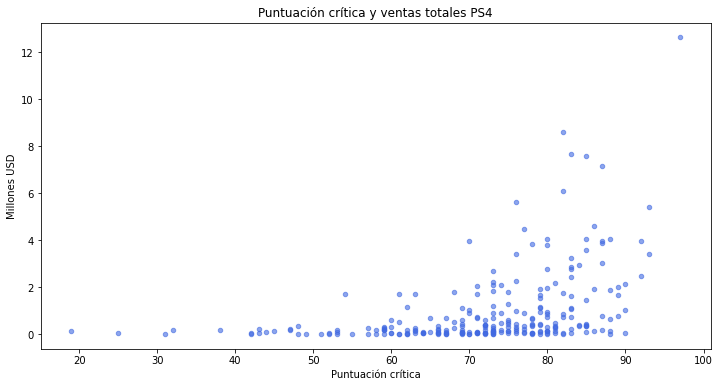

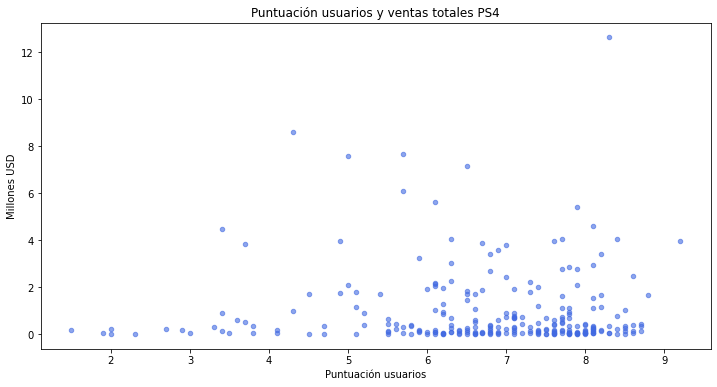

In [40]:
# seleccionare PS4 para analizar las críticas de usuarios y profesionales
PS4 = model_data[model_data['platform'] == 'PS4' ]

# creo el grafico de dispersión de ventas vs critic score
PS4.plot(kind= 'scatter',
         x=['critic_score'],
         y='total_sales',
         title = "Puntuación crítica y ventas totales PS4",
         figsize = (12,6),
         xlabel = 'Puntuación crítica',
         ylabel = 'Millones USD',
         color = "#4169e1",
         alpha = 0.60
         
        )

# creo el grafico de dispersión de ventas vs user score
PS4.plot(kind= 'scatter',
         x=['user_score'],
         y='total_sales',
         title = "Puntuación usuarios y ventas totales PS4",
         figsize = (12,6),
         xlabel = 'Puntuación usuarios',
         ylabel = 'Millones USD',
         color = "#4169e1",
         alpha = 0.60
        )
plt.show()

In [41]:
# analizo la correlación entre ambas columnas y las ventas totales

print('Corr PS4 Critica :', PS4['total_sales'].corr(PS4['critic_score']))
print('Corr PS4 Usuarios :',PS4['total_sales'].corr(PS4['user_score']))

Corr PS4 Critica : 0.406567902061781
Corr PS4 Usuarios : -0.031957110204556424


**Conclusión PS4** 

**La correlación entre la puntuación de la crítica y las ventas es débil 0.41**, sin embargo, en el grafico podemos evidenciar que las ventas suelen ser más favorables cuando la puntuación es 70 o más.

**No hay correlación entre la puntuación de usuarios y las ventas totales** se analizarán los datos en otras plataformas.


3.9 Teniendo en cuenta tus conclusiones compara las ventas de los mismos juegos en otras plataformas.

In [42]:
# juegos de PS4 para filtrar otras plataformas con esos mismos títulos con isin
other_platforms = model_data[model_data['name'].isin(PS4['name'])]

# filtro las filas que son diferentes a PS4
other_platforms = other_platforms[other_platforms!='PS4']

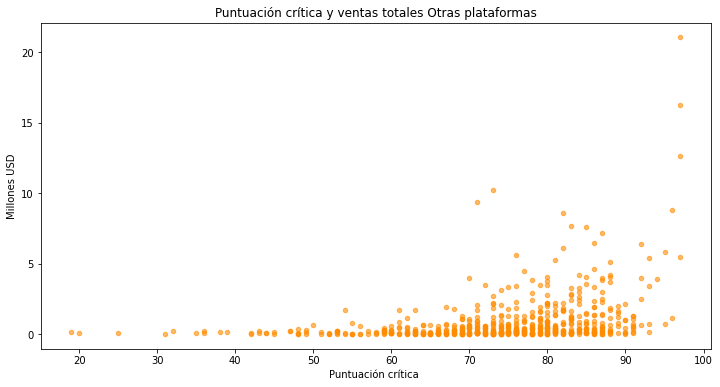

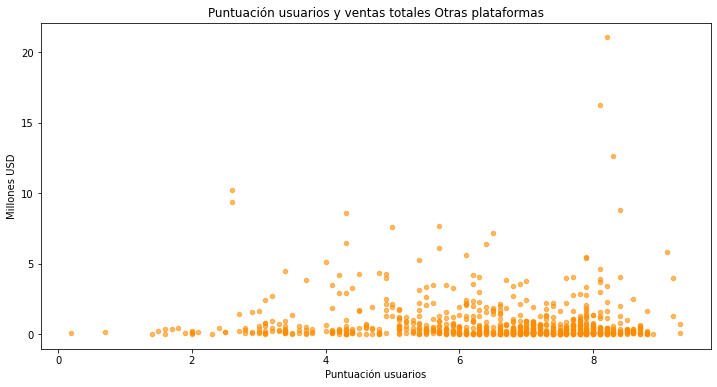

In [43]:
# creo el grafico de dispersión de ventas vs critic score para otras plataformas
other_platforms.plot(kind= 'scatter',
         x=['critic_score'],
         y='total_sales',
         title = "Puntuación crítica y ventas totales Otras plataformas",
         figsize = (12,6),
         xlabel = 'Puntuación crítica ',
         ylabel = 'Millones USD',
         color = "#ff8c00",
         alpha = 0.60   
         
        )

# creo el grafico de dispersión de ventas vs user score para otras plataformas
other_platforms.plot(kind= 'scatter',
         x=['user_score'],
         y='total_sales',
         title = "Puntuación usuarios y ventas totales Otras plataformas",
         figsize = (12,6),
         xlabel = 'Puntuación usuarios',
         ylabel = 'Millones USD',
         color = "#ff8c00",
         alpha = 0.60
        )

plt.show()

In [44]:
print('Corr Otras critica :',other_platforms['total_sales'].corr(other_platforms['critic_score']))
print('Corr Otras usuarios :', other_platforms['total_sales'].corr(other_platforms['user_score']))

Corr Otras critica : 0.32887278314533913
Corr Otras usuarios : -0.038013591559597985


**Conclusión Otras Plataformas** 

**La correlación entre la puntuación de la crítica es débil** para los mismos juegos de PS4 en otras plataformas, y sigue la misma tendencia descrita anteriormente.

**No existe correlación entre la puntuación de usuarios y las ventas totales**, lo que refuerza pensar que esta no incide en el total de ventas de los juegos de la forma como lo hace la puntuación de la crítica.

3.10 Echa un vistazo a la distribución general de los juegos por género. ¿Qué se puede decir de los géneros más rentables? ¿Puedes generalizar acerca de los géneros con ventas altas y bajas?

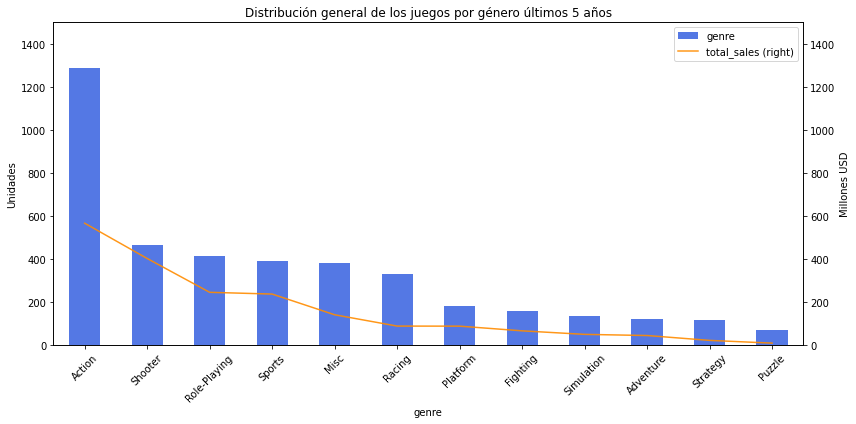

In [45]:
# uso groupby para encontrar las unidades vendidas por genero
top_genres = model_data.groupby(by=['genre'])['genre'].count().sort_values(ascending=False)

# creo un gráfico de barras para las unidades en el eje 1
ax = top_genres.plot(kind= 'bar',
         x=['genre'],
         y=['genre'],
         title = "Distribución general de los juegos por género últimos 5 años",
         figsize = (12,6),
         xlabel = 'genero',
         ylabel = 'Unidades',
         color = "#4169e1",  #color azul
         alpha = 0.9,
         legend = True
                )

# uso groupby para encontrar las ventas totales por genero
top_genres_sales = model_data.groupby(by=['genre'])['total_sales'].sum().sort_values(ascending=False)


# creo un gráfico de barras para las ventas totales en el eje 2
ax2 = top_genres_sales.plot(kind= 'line',
         secondary_y = True,
         x=['genre'],
         y=['total_sales'],
         alpha = 0.9,
         color = '#ff8c00',       #color naranja                                 
         rot = 45,
         stacked = True,
         legend = True
                )

ax.set_ylim(0,1500)               #defino el limite del eje 1
ax2.set_ylim(0,1500)              #defino el limite del eje 2
ax2.set_ylabel("Millones USD")    #nombre eje 2
plt.tight_layout()
plt.show()

In [46]:
# analizo el porcentaje de ventas de cada genero para interpretar el análisis
Sales_perc = top_genres_sales/ top_genres_sales.sum()
Sales_perc.head(5)

genre
Action          0.288100
Shooter         0.204806
Role-Playing    0.124973
Sports          0.120832
Misc            0.071921
Name: total_sales, dtype: float64

**Observaciones:**

1. **Action, Shooter, Role-playing, Sports y Misc** son los 5 géneros más vendidos. Además **Action y Shooter representan el 49% de las ventas totales.**


2. Teniendo en cuenta las ventas podemos ver que Action es el género con más unidades vendidas, sin embargo **Shooter genera más USD por cada unidad vendida** lo que implica una oportunidad de negocio atractiva.


3. **Role playing, Sport** y Misc han vendido sobre 400 unidades, las 2 primeras **generan ingresos similares** vs misc que genera menos USD por cada unidad. 


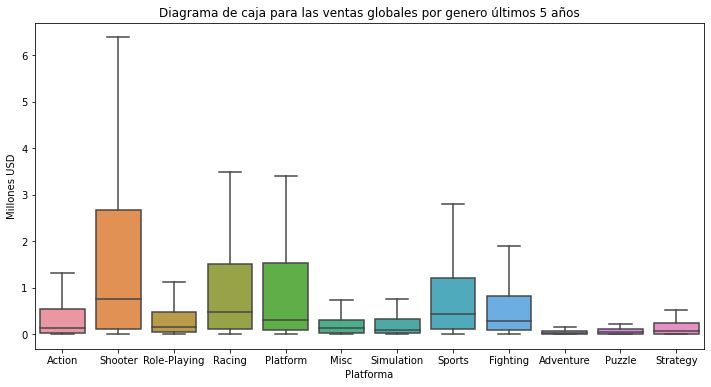

In [47]:
#uso groupby para analizar las ventas totales por genero
box_genre = model_data.groupby(['genre','name'])['total_sales'].sum().reset_index()

# creo un plot vacio
plt.figure(figsize=(12,6))

# creo un orden para las cajas
order = model_data['genre'].unique()

#uso seaborn para crear el box con mayor facilidad
box_2 = sns.boxplot(data = box_genre,
            x='genre',
            y='total_sales',
            showfliers=False,                    
            order = order,             
            )


# defino un título para la gráfica, y los nombres de los ejes
box_2.set_title('Diagrama de caja para las ventas globales por genero últimos 5 años')
plt.xlabel('Platforma')
plt.ylabel('Millones USD')
plt.show()

In [48]:
# creo una pivot table para analizar promedio, varianza y total de ventas
model_data.pivot_table(index= 'genre', values = "total_sales", aggfunc =['mean', 'var','sum']).sort_values(('sum',"total_sales"), ascending = False)

,mean,var,sum
,total_sales,total_sales,total_sales
genre,,,
Action,0.439488,1.242395,566.94
Shooter,1.210300,5.107317,403.03
Role-Playing,0.525491,1.682178,245.93
Sports,0.606582,1.148438,237.78
Misc,0.369530,0.907739,141.53
Racing,0.489176,1.454034,89.03
Platform,0.726885,2.291699,88.68
Fighting,0.420755,0.664160,66.90


**Observaciones géneros** 
1. De los géneros más vendidos podemos encontrar que **Shooter es el que tiene mayor promedio de ventas 1.21M.**


2. **Action, por otra parte, tiene un comportamiento estable en comparacion**, con un promedio menor (0.44M) pero unas ventas predecibles en comparación a otros géneros.


3. Por último, otros mercados de géneros tienen similitud en sus distribuciones, por ejemplo platform y racing o misc y simulation, lo que indica patrones de consumo similares en estos géneros.



<div class="alert alert-block alert-success">
<b>Comentario del revisor:</b> <a class="tocSkip"></a>

Muy buen trabajo con el análisis exploratorio de los datos. Desarrollaste gráficas de box-plots para analizar ventas de las plataformas que más venden, scatter plots para ver la relación entre las score de usuarios y de los criticos respecto a las ventas, gráficas para identificar los juegos más populares en las distintas plataformas, gráficas de barras para analizar los géneros de juegos más populares y agregaste la conclusión y la interpretación de cada uno de estos resultados.   

</div>

**Paso 4. Crea un perfil de usuario para cada región**

4.1 Para cada región (NA, UE, JP) determina Las cinco plataformas principales. Describe las variaciones en sus cuotas de mercado de una región a otra.

In [49]:
# creo una pivot table con las ventas de NA por plataforma
NA = model_data.pivot_table(index='platform', values='na_sales', aggfunc=['sum']).reset_index()
NA.columns = NA.columns.droplevel(1)

# calculo la cuota de mercado
NA['market_share']= NA['sum']/NA['sum'].sum()
NA['region']= 'NA'

#uso sort_values y head para las 5 plataformas más importantes
NA = NA.sort_values(by='sum', ascending = False).head().reset_index(drop=True)
NA

,platform,sum,market_share,region
0,X360,228.18,0.272952,NA
1,PS3,170.85,0.204373,NA
2,PS4,108.74,0.130076,NA
3,XOne,93.12,0.111392,NA
4,3DS,83.21,0.099537,NA


In [50]:
# creo una pivot table con las ventas de UE por plataforma
UE = model_data.pivot_table(index='platform', values='eu_sales', aggfunc=['sum']).reset_index()
UE.columns = UE.columns.droplevel(1)

# calculo la cuota de mercado
UE['market_share']= UE['sum']/UE['sum'].sum()
UE['region']= 'UE'

#uso sort_values y head para las 5 plataformas más importantes
UE = UE.sort_values(by='sum', ascending = False).head().reset_index(drop=True)
UE

,platform,sum,market_share,region
0,PS3,165.47,0.245261,UE
1,PS4,141.09,0.209124,UE
2,X360,117.87,0.174708,UE
3,3DS,61.48,0.091126,UE
4,PC,57.38,0.085049,UE


In [51]:
# creo una pivot table con las ventas de JP por plataforma
JP = model_data.pivot_table(index='platform', values='jp_sales', aggfunc=['sum']).reset_index()
JP.columns = JP.columns.droplevel(1)

# calculo la cuota de mercado
JP['market_share']= JP['sum']/JP['sum'].sum()
JP['region']= 'JP'

#uso sort_values y head para las 5 plataformas más importantes
JP = JP.sort_values(by='sum', ascending = False).head().reset_index(drop=True)
JP

,platform,sum,market_share,region
0,3DS,100.65,0.408018,JP
1,PS3,50.07,0.202976,JP
2,PSP,24.28,0.098427,JP
3,PSV,21.91,0.088820,JP
4,PS4,15.96,0.064699,JP


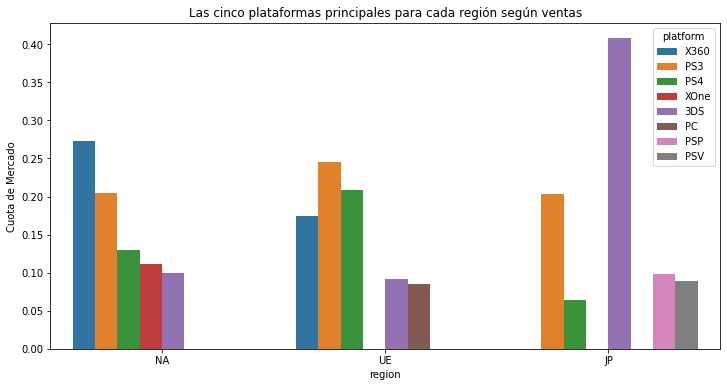

In [52]:
# creo un nuevo dataframe con la información de todas las regiones con el uso de append()
Regions = NA.append(UE, ignore_index=False, verify_integrity=False, sort=None)
Regions = Regions.append(JP, ignore_index=False, verify_integrity=False, sort=None).reset_index(drop = True)


# creo un gráfico de barras agrupado por cada región y plataforma
plt.figure(figsize=(12,6))
x = sns.barplot(x="region", 
                 y="market_share", 
                 data= Regions, 
                 hue = 'platform')

# defino un título para la gráfica, y los nombres del eje
x.set_title('Las cinco plataformas principales para cada región según ventas')
plt.ylabel('Cuota de Mercado')
plt.show()

**Observaciones:**

1. **Para NA** las plataformas más importantes son **Xbox 360 seguido por PS3**.
2. **Para UE** las plataformas más importantes son **PS3 seguido PS4**.
3. **Para JP** la plataforma más importante con diferencia es **DS3 seguida por PS3** y sin presencia de Xbox en sus principales plataformas.


4.2 Los cinco géneros principales. Explica la diferencia.

In [53]:
# creo una pivot table con las ventas de NA por genero
NA_gen = model_data.pivot_table(index='genre', values='na_sales', aggfunc=['sum']).reset_index()
NA_gen.columns = NA_gen.columns.droplevel(1)

# calculo la cuota de mercado
NA_gen['market_share']= NA_gen['sum']/NA_gen['sum'].sum()
NA_gen['region']= 'NA'

#uso sort_values y head para los 5 géneros más importantes
NA_gen = NA_gen.sort_values(by='sum', ascending = False).head().reset_index(drop=True)
NA_gen

,genre,sum,market_share,region
0,Action,234.92,0.281015,NA
1,Shooter,194.49,0.232652,NA
2,Sports,108.86,0.130220,NA
3,Role-Playing,83.89,0.100350,NA
4,Misc,70.80,0.084692,NA


In [54]:
# creo una pivot table con las ventas de UE por genero
UE_gen = model_data.pivot_table(index='genre', values='eu_sales', aggfunc=['sum']).reset_index()
UE_gen.columns = UE_gen.columns.droplevel(1)

# calculo la cuota de mercado
UE_gen['market_share']= UE_gen['sum']/UE_gen['sum'].sum()
UE_gen['region']= 'UE'

#uso sort_values y head para los 5 géneros más importantes
UE_gen = UE_gen.sort_values(by='sum', ascending = False).head().reset_index(drop=True)
UE_gen

,genre,sum,market_share,region
0,Action,202.58,0.300265,UE
1,Shooter,148.07,0.219470,UE
2,Sports,88.83,0.131664,UE
3,Role-Playing,62.35,0.092416,UE
4,Racing,40.92,0.060652,UE


In [55]:
# creo una pivot table con las ventas de JP por genero
JP_gen = model_data.pivot_table(index='genre', values='jp_sales', aggfunc=['sum']).reset_index()
JP_gen.columns = JP_gen.columns.droplevel(1)

# calculo la cuota de mercado
JP_gen['market_share']= JP_gen['sum']/JP_gen['sum'].sum()
JP_gen['region']= 'JP'

#uso sort_values y head para los 5 géneros más importantes
JP_gen = JP_gen.sort_values(by='sum', ascending = False).head().reset_index(drop=True)
JP_gen

,genre,sum,market_share,region
0,Role-Playing,79.98,0.324226,JP
1,Action,64.26,0.260499,JP
2,Misc,17.85,0.072361,JP
3,Fighting,12.38,0.050186,JP
4,Platform,12.13,0.049173,JP


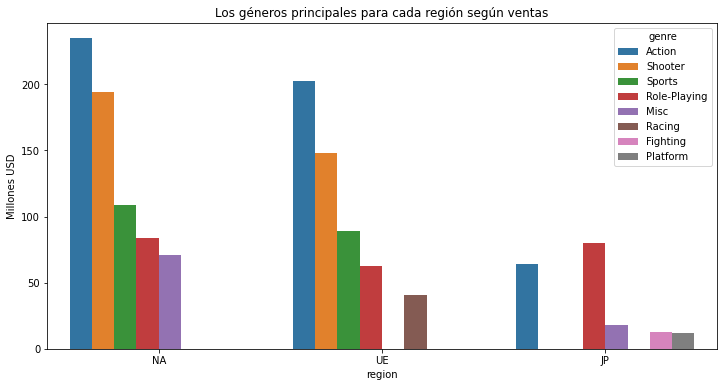

In [56]:
# creo un nuevo dataframe con la información de todas las regiones con el uso de append()
Regions_gen = NA_gen.append(UE_gen, ignore_index=False, verify_integrity=False, sort=None)
Regions_gen = Regions_gen.append(JP_gen, ignore_index=False, verify_integrity=False, sort=None).reset_index(drop = True)

# creo un gráfico de barras agrupado por cada región y genero
plt.figure(figsize=(12,6))
ax = sns.barplot(x="region", 
                 y="sum", 
                 data= Regions_gen, 
                 hue = 'genre',
                 )

# defino un título para la gráfica, y los nombres del eje
ax.set_title('Los géneros principales para cada región según ventas')
plt.ylabel('Millones USD')
plt.show()

**Observaciones regiones & generos:**

1. **Para NA y UE predominan los juegos de accion y shooter,** además poseen un perfil bastante similar en términos de los géneros favoritos. Esto se puede explicar por las plataformas favoritas analizadas anteriormente y los juegos que ofrecen, además de una afinidad cultural.


2. **Para JP predomina los juegos de Role y los juegos de acción**, y a diferencia de NA y UE no hay presencia importante de los shooter y juegos sport. Lo que indica un interes por juegos de aventura y role además de que puede que en la sociedad no sean ampliamente aceptados cierto tipos de juegos.


3. **Tamaño de los mercados de cada región**, analizando por ventas podemos comparar el tamaño de los mercados siendo **NA el más importante, luego UE y el menor JP.**


4.3 Si las clasificaciones de ESRB afectan a las ventas en regiones individuales.

In [57]:
# creo una pivot table con las ventas de NA por rating
NA_rate = model_data.pivot_table(index='rating', values='na_sales', aggfunc=['sum']).reset_index()
NA_rate.columns = NA_rate.columns.droplevel(1)

# calculo la cuota de mercado
NA_rate['market_share']= NA_rate['sum']/NA_rate['sum'].sum()
NA_rate['region']= 'NA'


#uso sort_values y head para los 5 ratings  más importantes
NA_rate = NA_rate.sort_values(by='sum', ascending = False).head().reset_index(drop=True)
NA_rate

,rating,sum,market_share,region
0,M,309.65,0.434944,NA
1,E,170.53,0.239532,NA
2,E10+,120.03,0.168598,NA
3,T,111.30,0.156336,NA
4,EC,0.42,0.000590,NA


In [58]:
# creo una pivot table con las ventas de UE por rating
UE_rate = model_data.pivot_table(index='rating', values='eu_sales', aggfunc=['sum']).reset_index()
UE_rate.columns = UE_rate.columns.droplevel(1)

# calculo la cuota de mercado
UE_rate['market_share']= UE_rate['sum']/UE_rate['sum'].sum()
UE_rate['region']= 'UE'

#uso sort_values y head para los 5 ratings  más importantes
UE_rate = UE_rate.sort_values(by='sum', ascending = False).head().reset_index(drop=True)
UE_rate

,rating,sum,market_share,region
0,M,251.67,0.451151,UE
1,E,141.95,0.254464,UE
2,T,84.31,0.151137,UE
3,E10+,79.88,0.143195,UE
4,RP,0.03,0.000054,UE


In [59]:
# creo una pivot table con las ventas de JP por rating
JP_rate = model_data.pivot_table(index='rating', values='jp_sales', aggfunc=['sum']).reset_index()
JP_rate.columns = JP_rate.columns.droplevel(1)

# calculo la cuota de mercado
JP_rate['market_share']= JP_rate['sum']/JP_rate['sum'].sum()
JP_rate['region']= 'JP'

#uso sort_values y head para los 5 ratings  más importantes
JP_rate = JP_rate.sort_values(by='sum', ascending = False).head().reset_index(drop=True)
JP_rate

,rating,sum,market_share,region
0,E,36.68,0.339127,JP
1,T,33.47,0.309449,JP
2,M,26.78,0.247596,JP
3,E10+,11.23,0.103828,JP
4,EC,0.00,0.000000,JP


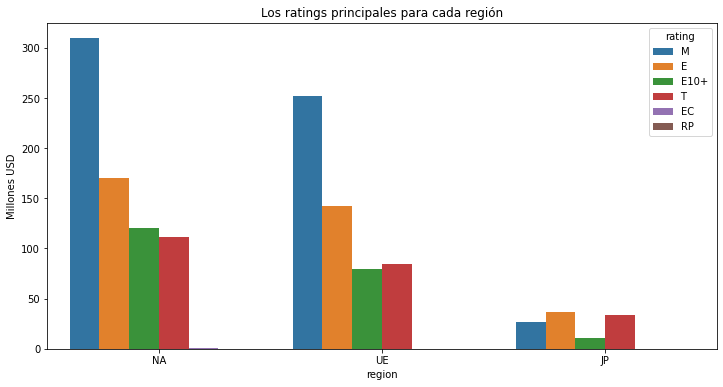

In [60]:
# creo un nuevo dataframe con la información de todas las regiones con el uso de append()
Regions_rate = NA_rate.append(UE_rate, ignore_index=False, verify_integrity=False, sort=None)
Regions_rate = Regions_rate.append(JP_rate, ignore_index=False, verify_integrity=False, sort=None).reset_index(drop = True)


# creo un gráfico de barras agrupado por cada región y genero
plt.figure(figsize=(12,6))
ax = sns.barplot(x="region", 
                 y="sum", 
                 data= Regions_rate, 
                 hue = 'rating')

# defino un título para la gráfica, y los nombres del eje
ax.set_title('Los ratings principales para cada región')
plt.ylabel('Millones USD')
plt.show()

**Significado de Rating:**
**M:** Mature +17,
**E:** Everyone,
**E10+:** Everyone +10,
**T:** Teen,
**EC:** Early Childhood,
**RP:** Rate Pending,

**Observaciones regiones & ratings:**

1. **Para NA y UE predomina el rating M +17, seguido por E y E10+ y por último Teen** , comparten perfiles de usuario muy similares en términos de rating **inclinados a los juegos para adultos y adolescentes.**


2. **Para JP por el contrario los juegos que más generan ventas tienen rating E y luego Teen**, tiene sentido debido a las plataformas y géneros favoritos en la región que identificamos anteriormente (ejemplo: Nintendo con la 3Ds)



<div class="alert alert-block alert-success">
<b>Comentario del revisor:</b> <a class="tocSkip"></a>

Excelente! Con este análisis por región ayuda a complementar el análisis general anterior y a hacer zoom a los resultados por cada una de las regiones.   

</div>

**Paso 5. Prueba las siguientes hipótesis:**

**Nota:** Para ambas hipótesis se utilizó la prueba de **t.studen con un alpha de 0.05** ya que las muestras siguen una distribución normal y esto nos permite analizar la probabilidad de que sean iguales o diferentes.

**Para analizar las hipótesis utilizare cada una como hipótesis nula y creare a continuación la hipótesis alternativa que será opuesta**, como se indica a continuación.


**Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas.**

**H0:** Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC **son las mismas.**

**H1:** Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC **No son las mismas.**

In [61]:
# creo una tabla con solo los datos para Xbox One
# luego creo una tabla con solo los datos PC
xbox = model_data[model_data['platform'] == "XOne"].dropna()
pc = model_data[model_data['platform'] == "PC"].dropna()

# Varianza de cada plataforma
print('Xbox var:', np.var(xbox['user_score']))
print('Pc Var:', np.var(pc['user_score']))

# Prueba las hipótesis
alpha = 0.05

#uso t-student para comparar dos muestras independientes y defino equal_var = Fasle
results = st.ttest_ind(xbox['user_score'],pc['user_score'],equal_var= False)

#extraigo solo el p-value del test
print('p-value:', results.pvalue)


#creo un if para el resultado 
if results.pvalue < alpha:
    print("Rechazamos H0")  #si el p-value es menor a 5% rechazamos la Hipotesis nula
else:
    print("No rechazamos H0")  #si el p-value es mayor a 5% NO rechazamos la Hipotesis nula
    

Xbox var: 1.780140817214509
Pc Var: 2.5824956924172304
p-value: 0.7557794390698395
No rechazamos H0


**No Rechazamos la Hipótesis Nula:**  Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC **son las mismas.**

Si lo vemos gráficamente podemos evidenciar la similitud de las distribuciones para ambas plataformas


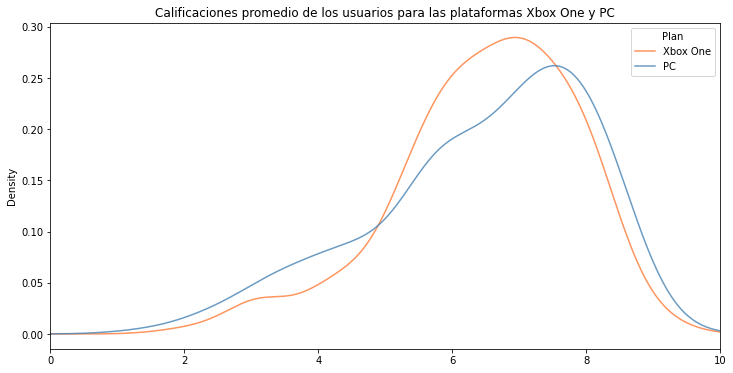

In [62]:
# creo una linea para xbox con kind=kde: para graficar la distribución
xbox['user_score'].plot(kind='kde',
                figsize = (12,6),
                xlim=(0,10),
                color= "#FE7A36",
                alpha =0.8,
                title = "Calificaciones promedio de los usuarios para las plataformas Xbox One y PC"
                )

# creo una linea para PC con kind=kde: para graficar la distribución
pc['user_score'].plot(kind='kde',
                color="steelblue",
                alpha =0.8)

#agrego una legenda a la grafica
plt.legend(['Xbox One', 'PC'], title='Plan')
plt.show()

**Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.**

usare como **H0: Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes No son diferentes.** Para asi poder comparar con mayor facilidad los resultados


**H0:** Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes **No son diferentes.**

**H1:** Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes **son diferentes.**

In [63]:
# creo una tabla con solo los datos para accion
# luego creo una tabla con solo los sport
action = model_data[model_data['genre'] == "Action"].dropna()
sport = model_data[model_data['genre'] == "Sports"].dropna()

# Varianza de cada plataforma
print('action var:', np.var(action['user_score']))
print('sport Var:', np.var(sport['user_score']))

# Prueba las hipótesis
alpha = 0.05

#uso t-student para comparar dos muestras independientes y defino equal_var = Fasle
results = st.ttest_ind(action['user_score'],sport['user_score'],equal_var= False)

#extraigo solo el p-value del test
print('p-value:', results.pvalue)

#creo un if para el resultado 
if results.pvalue < alpha:
    print("Rechazamos H0")      #si el p-value es menor a 5% rechazamos la Hipotesis nula
else:
    print("No rechazamos H0")   #si el p-value es mayor a 5% NO rechazamos la Hipotesis nula
    

action var: 1.6638331824247796
sport Var: 1.9632170811766188
p-value: 3.017792093288514e-12
Rechazamos H0


**Rechazamos la Hipótesis Nula:** Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes **No son diferentes.**

Si lo vemos gráficamente podemos evidenciar que acción y deportes poseen distribuciones significativamente diferentes.


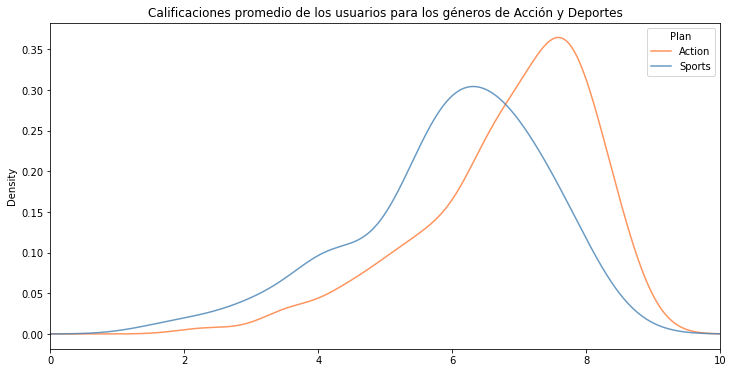

In [64]:
action['user_score'].plot(kind='kde',
                figsize = (12,6),
                xlim=(0,10),
                color= "#FE7A36",
                alpha =0.8,
                title = "Calificaciones promedio de los usuarios para los géneros de Acción y Deportes"          
                )

sport['user_score'].plot(kind='kde',
                color="steelblue",
                alpha =0.8)

plt.legend(['Action', 'Sports'], title='Plan')
plt.show()

**Paso 6. Escribe una conclusión general**

En primer lugar se realizó una exploración y limpieza de los datos de ventas de videojuegos, en la cual se abordaron valores ausentes en las columnas `"name"` `"genre"` y `"year of release"`, se decide mantener valores ausentes en las columnas `"critic_score"`, `"user_score"` y `"rating"` para no afectar los la precisión de los mismos.

Basado en el análisis de los datos se identificaron los siguientes patrones que determinan si un juego tiene éxito o no y se respondieron a las siguientes preguntas para los datos de los últimos 5 años:

**1. ¿Qué plataformas son líderes en ventas?**
- La plataforma potencial con mayor crecimiento es **la PS4 seguida por la Xbox One** y se recomienda enfocar los esfuerzos de marketing estas mismas.

- Por otra parte **PC, WiiU y PSV han disminuido en ventas.**
- **Los ciclos de vida son importantes** y las plataformas tienen un pedido de ventas exitoso de 3 a 5 años para una nueva campaña es importante concentrarse en la nuevas generaciones de consolas para maximizar las ventas.


**2. Cómo las reseñas de usuarios y profesionales afectan las ventas?**

- Las ventas suelen ser más favorables cuando la puntuación es 70 o más, sin embargo esto no garanitza el exito del juego. 
- La puntuación de usuarios no afecta de la misma forma las ventas totales y es una relación mucho más débil.

**3. Cuáles son los géneros con mayores ventas para tenerlos en cuenta en la campaña?**
- **Action, Shooter, Role-playing, Sports y Misc** son los 5 géneros más vendidos.

- **Action y Shooter representan el 49% de las ventas totales**, por lo que se perfilan como los mercados más rentables en los últimos 5 años.

- **Shooter es el género con mayor promedio de ventas (1.21M)** y ganancia por unidad vendida.

- **Action, por otra parte, tiene un comportamiento estable en comparación (0.44M)**, un mercado mayor pero menor ganancia por unidad.

**4. Crea un perfil por región:** se obtuvieron conclusiones importantes sobre las preferencias de plataformas, género y rating de los usuarios para cada región descritas a continuación:

**Las plataformas favoritas en cada región son:**
- Norte América: Xbox 360 y PS3.
- Europea : PS3 y PS4.
- Japón: DS3 y PS3 

**Los géneros favoritos en cada región son:**
- Para **Norte América y Europa** predominan los juegos de **acción y shooter**, 
- Para **Japón** predominan los juegos de **role y acción**

**Los Calificaciones ESRB más vendidas en cada región son:**
- Para **Norte América y Europa** predomina el rating M +17, seguido por E y E10+ y por último adolecente (**mercados inclinados a los juegos para adultos y adolescentes.**)

- Para **Japón** por el contrario los juegos que más generan ventas tienen rating E y luego Teen **(mercado inclinado a (todo el mundo y adolescentes**)

**5. Prueba de hipótesis:**

1. **Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas.** 
No Rechazada: Es razonable pensar que las calificaciones de Xbox y PC son significativamente las mismas.


2. **Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes No son diferentes.**
Rechazada: Es razonable pensar que las calificaciones son significativamente diferentes.

